# Day 11
batch size 256 lr 1e-3, normed weighted, non-rotated, cartesian, SWA test

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
classModel = 'modelSwish'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [3]:
with open(dirLoc + 'inputPipe.pkl', 'r') as fin:
    inputPipe = pickle.load(fin)

In [4]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'train.hdf5', "r+"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.167s 


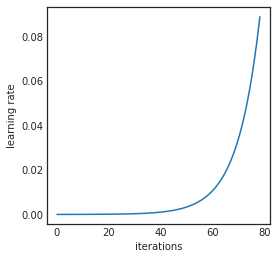

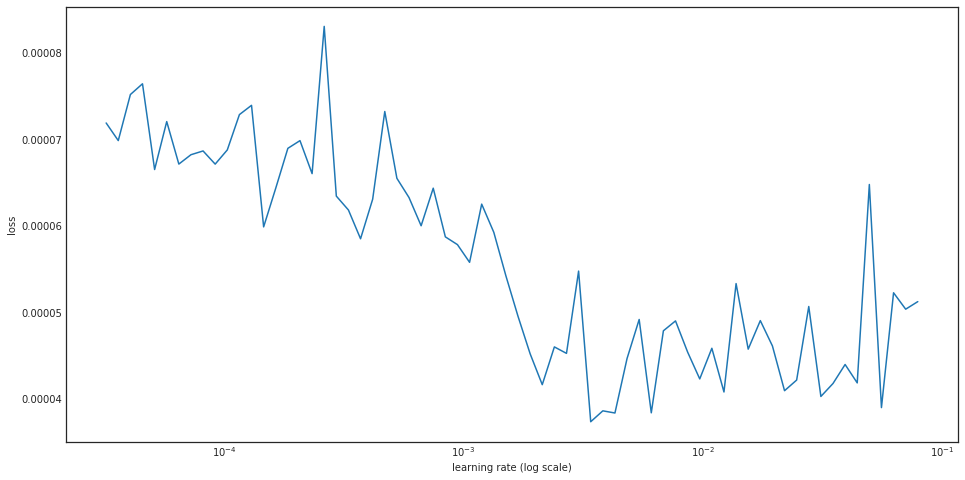

______________________________________



In [5]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [5]:
compileArgs['lr'] = 1e-3

## Train classifier

Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.96561180211e-05
2 New best found: 3.70745600246e-05
3 New best found: 3.59394833437e-05
4 New best found: 3.54167562935e-05
5 New best found: 3.53397891599e-05
6 New best found: 3.48122711907e-05
7 New best found: 3.48109788415e-05
8 New best found: 3.4473881187e-05
9 New best found: 3.42503245715e-05
10 New best found: 3.41972441874e-05
11 New best found: 3.39502991963e-05
12 New best found: 3.38572202477e-05
13 New best found: 3.37178592871e-05
16 New best found: 3.34114502603e-05
19 New best found: 3.32750846976e-05
25 New best found: 3.30012108513e-05
28 New best found: 3.27167662284e-05
39 New best found: 3.25577607401e-05
46 New best found: 3.24948267952e-05
52 New best found: 3.24420443847e-05
59 New best found: 3.23447778381e-05
69 New best found: 3.22923633578e-05
72 New best found: 3.22243000985e-05
74 New best found: 3.22101103085e-05
79 New best found: 3.21947298847e-05
8

23 New best found: 3.33662573178e-05
24 New best found: 3.32567408293e-05
31 New best found: 3.32438822587e-05
36 New best found: 3.30887475285e-05
38 New best found: 3.3056754851e-05
39 New best found: 3.28708364654e-05
45 New best found: 3.28364073963e-05
47 New best found: 3.28344426006e-05
49 New best found: 3.27221068796e-05
61 New best found: 3.26741353691e-05
63 New best found: 3.2657900283e-05
69 New best found: 3.25342050473e-05
72 New best found: 3.24667533051e-05
77 New best found: 3.2455104553e-05
89 New best found: 3.23902732429e-05
98 New best found: 3.23140585613e-05
104 New best found: 3.22663584721e-05
115 New best found: 3.22596637587e-05
122 New best found: 3.22075211964e-05
132 New best found: 3.21152896996e-05
177 New best found: 3.21005974959e-05
194 New best found: 3.20104538109e-05
Early stopping after 244 epochs
Score is: {'loss': 3.201045381085466e-05, 'AUC': 0.10676645794680006, 'wAUC': 0.06493560566289502}
Fold took 290.906s

Running fold 8 / 10
1 New best f

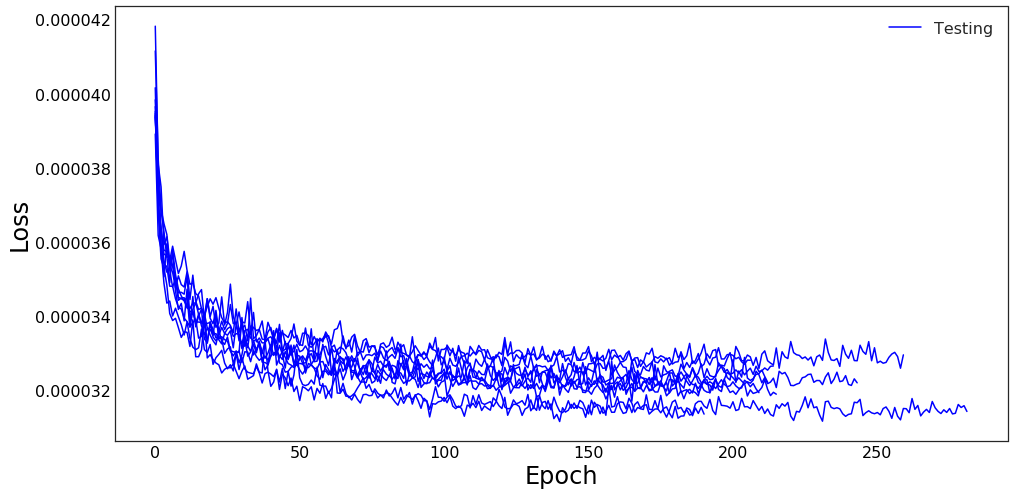

Mean loss = 3.19e-05 +- 1e-07
Mean AUC = 0.1017 +- 0.0008
Mean wAUC = 0.0643 +- 0.0006
______________________________________



In [6]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, modelParams, trainParams, swaStart=-1,
                                          patience=50, cosAnnealMult=0, reduxDecay=False, trainOnWeights=True,
                                          maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [5]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [6]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 1 with loss = 3.081834277645131e-05
Model 1 is 5 with loss = 3.0872881186835534e-05
Model 2 is 7 with loss = 3.1133123032824354e-05
Model 3 is 0 with loss = 3.124075680919089e-05
Model 4 is 4 with loss = 3.1504365232901894e-05
Model 5 is 2 with loss = 3.179996855352909e-05
Model 6 is 6 with loss = 3.2064552728697566e-05
Model 7 is 8 with loss = 3.231228751051368e-05
Model 8 is 3 with loss = 3.2595311997671726e-05
Model 9 is 9 with loss = 3.3109084638750596e-05


## Response on validation data base

In [9]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [10]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=0)

In [11]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source)))

Testing ROC AUC: unweighted 0.902130162544, weighted 0.935563415312


In [12]:
amsScanQuick(convertToDF(valData.source))

50000 candidates loaded
3.871075357519875 0.9559333


(3.871075357519875, 0.9559333)

## Response on validation data merged

In [51]:
merged = getModel(**modelParams)

In [52]:
mergedParams = merged.get_weights()
for param in mergedParams:
    param.fill(0)

In [53]:
for model, weight in zip(ensemble, weights):
    for param, modParam in zip(mergedParams, model.get_weights()):
        param += modParam

In [54]:
for param in mergedParams:
    param /= 10

In [55]:
merged.set_weights(mergedParams)

In [56]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [57]:
batchEnsemblePredict([merged], np.array([1]), valData, ensembleSize=1, verbose=0)

In [58]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source)))

Testing ROC AUC: unweighted 0.483388859656, weighted 0.595265045494


In [59]:
amsScanQuick(convertToDF(valData.source))

50000 candidates loaded
1.0867271622808339 0.48827246


(1.0867271622808339, 0.48827246)